In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization,Input, Dropout,GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import EfficientNetB0

bird_df = pd.read_csv("/kaggle/input/100-bird-species/birds.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dir_train = '../input/100-bird-species/train/'
dir_v = '../input/100-bird-species/valid/'
dir_test = '../input/100-bird-species/test/'

In [6]:
#Setting and couting the classes of bird based on the train dataset
classes = os.listdir(dir_train)
n_classes = len(classes)
print("Total Classes: ",n_classes)

Total Classes:  525


In [7]:
def bird_image(direct, classes):
    
    path = direct + classes #setting the folder
    
    random_image = random.sample(os.listdir(path),1)
    
    #read image and plotting it
    img = mpimg.imread(path + "/" + random_image[0] )
    plt.imshow(img)
    plt.title(classes)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
  
    return img


def img_view(row, col,bird):
    
    plt.figure(figsize = (15,15))
    
    for i in range(1,row*col+1):
        
        plt.subplot(row,col,i)
        if bird==random:
            bird_image(dir_train,classes[random.randint(0,n_classes)]);
        else:   
            
            bird_image(dir_train,bird)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


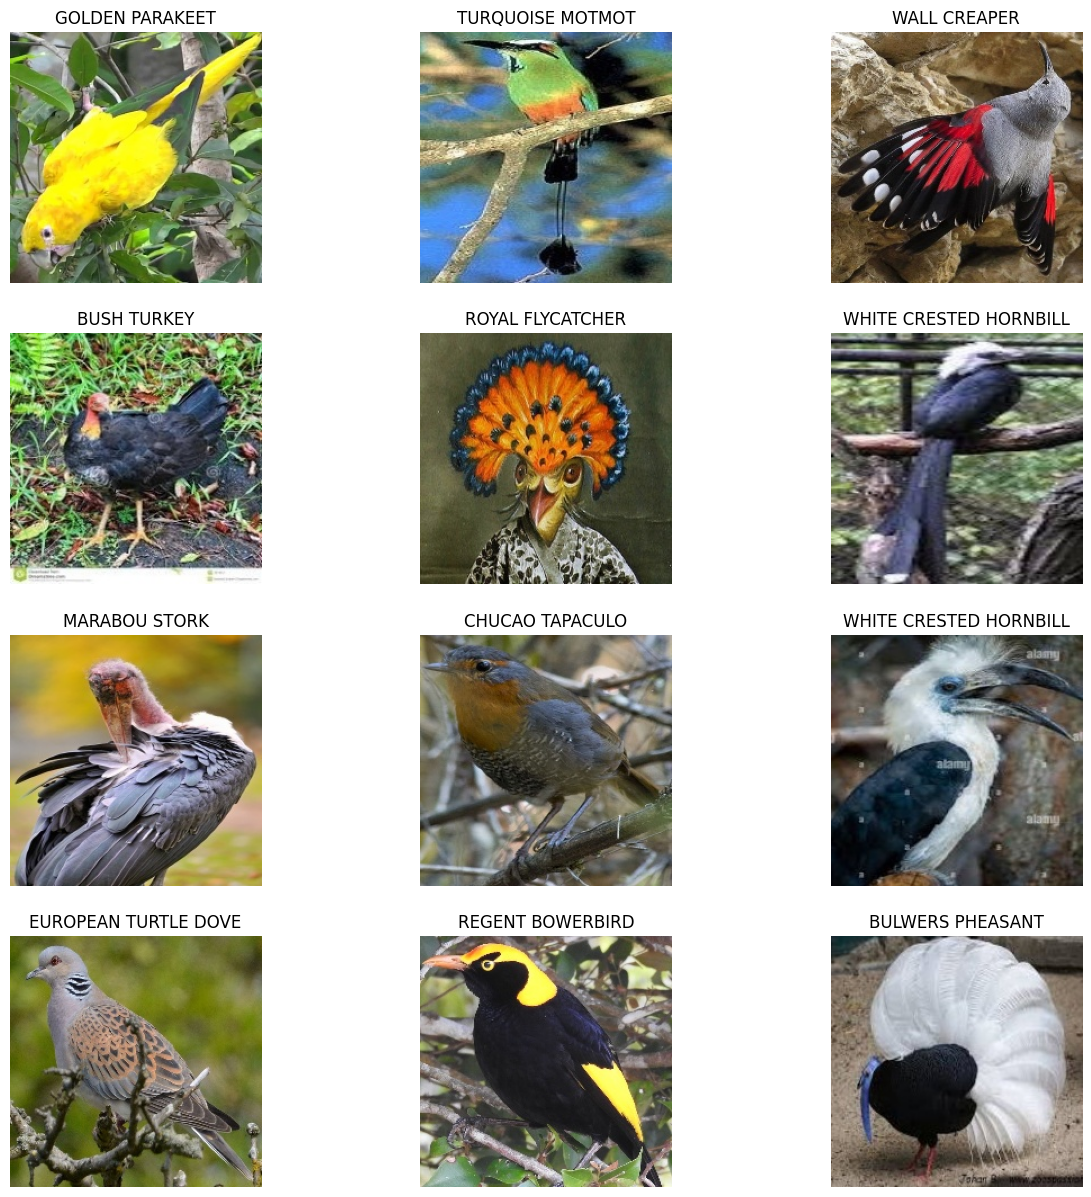

In [8]:
img_view(4,3,random)

In [9]:
#Verifing if all the classes of birds names match in the datasets

# Specify the paths of the train and test directories
train_directory = dir_train
test_directory = dir_v

# Get the list of files in the train and test directories
train_files = set(os.listdir(train_directory))
test_files = set(os.listdir(test_directory))

# Find files that don't match between test and train directories
mismatched_files = [test_file for test_file in test_files if test_file not in train_files]
num_mismatches = len(mismatched_files)

if num_mismatches == 0:
    print("All files in the test directory exist in the train directory.")
else:
    print(f"{num_mismatches} files in the test directory do not exist in the train directory.")
    print("Mismatched files:")
    for mismatched_file in mismatched_files:
        print(f"- {mismatched_file}")

1 files in the test directory do not exist in the train directory.
Mismatched files:
- PARAKETT AUKLET


# Обучеие

## Сгенерируем больше изоражений
Для генерации будем смещать изображение по ширине и длине, увеличивать уменьшать маштаб и вращать картинку.

In [10]:
tr_datagen = ImageDataGenerator(rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False, 
        rescale = 1/225)

val_datagen = ImageDataGenerator(rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False, 
        rescale = 1/225)

te_datagen = ImageDataGenerator(rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False, 
        rescale = 1/225) 

# Loading the data from the directories
train_data = tr_datagen.flow_from_directory(dir_train,batch_size=32, target_size = (224,224), class_mode = "categorical")

val_data = val_datagen.flow_from_directory(dir_v,batch_size=32, target_size = (224,224), class_mode = "categorical")

test_data = te_datagen.flow_from_directory(dir_test,batch_size=32, target_size = (224,224), class_mode = "categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


## EfficientNetB0 обучение бейзлайн модели

In [13]:
model = EfficientNetB0(input_shape=(224,224, 3), include_top=True, weights=None, classes=525)

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
epochs = 15
hist = model.fit(train_data, epochs=epochs, validation_data=val_data)

Epoch 1/15


2023-12-06 10:29:53.018331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inefficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2645/2645 [==============================] - 1654s 605ms/step - loss: 4.8667 - accuracy: 0.0838 - val_loss: 3.3676 - val_accuracy: 0.2579
Epoch 2/15
2645/2645 [==============================] - 1173s 443ms/step - loss: 2.7454 - accuracy: 0.3847 - val_loss: 1.8857 - val_accuracy: 0.5516
Epoch 3/15
2645/2645 [==============================] - 1193s 451ms/step - loss: 1.7756 - accuracy: 0.5808 - val_loss: 1.1607 - val_accuracy: 0.7070
Epoch 4/15
2645/2645 [==============================] - 1177s 445ms/step - loss: 1.3163 - accuracy: 0.6812 - val_loss: 0.8335 - val_accuracy: 0.7836
Epoch 5/15
2645/2645 [==============================] - 1183s 447ms/step - loss: 1.0476 - accuracy: 0.7392 - val_loss: 0.6625 - val_accuracy: 0.8198
Epoch 6/15
2645/2645 [==============================] - 1180s 446ms/step - loss: 0.8648 - accuracy: 0.7825 - val_loss: 0.5777 - val_accuracy: 0.8450
Epoch 7/15
2645/2645 [==============================] - 1176s 445ms/step - loss: 0.7331 - accuracy: 0.8120 - val_loss

## % Данных идущих на валидационную выборку и тестовую

In [25]:
(val_data.samples/(train_data.samples+val_data.samples))*100, test_data.samples*100/(train_data.samples+val_data.samples)

(3.0082512033004813, 3.0082512033004813)

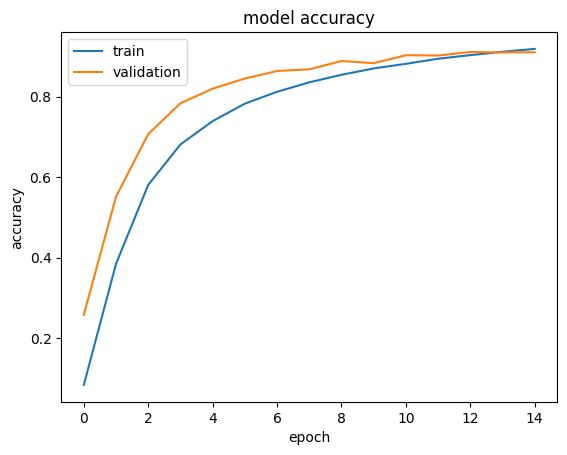

In [26]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

## Итоги
Как такового переобучения при тренировки EfficientNetB0 не наблюдается.  
Однако в данном наборе данных тестовая выборка не очень большая. Тестовая и валидационные выборки составляют лишь 3% от исходных данных в связи с этим на валидационной выборке наблюдается более высокая точность на раних эпохах обучения.

Модель обученая на базовом EfficientNetB0 показала вполне хорошие результы.
Маштабирование в данном случае будет лишнем. Для достижения оптиммума по точности вполне должно хватить 20-30 эпох обучения.
Неплохим решением было бы упращение модели уменьшение количества слоев и уменьшение ширины нейроной сети для более быстрого обучения.

При использование BatchNormalization и Dropout слоев функцианал ошибки падал медленеее и требовалось больше эпох на обучение.

Кривая обучения так же показывает что валидационная выборка изначально имеет значение функционала потерь меньше чем тренировачная, что скорей всего связано с малым размером валидационной выборки. 
Кривая обучения показывает плавное и равномерное увеличение точности что указывает на правильно выбранную архитектуру и птимизатор.

## Точность на тесте

In [31]:
model.evaluate(test_data,verbose=0)

[0.20356057584285736, 0.9443809390068054]

In [33]:
model.save('birds_EfficientNetB0.h5') 
model.save_weights('birds_EfficientNetB0_w.h5')

## Модель с Нормолизацией и Dropout слоями для уменьшения переобучения

In [32]:
def build_model(num_classes):
    inputs = Input(shape=(224, 224, 3))
    model = EfficientNetB0(input_tensor=inputs, include_top=True, weights=None, classes=num_classes)
    # include_top=True так как решаем задачу класиыфикации

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = model.output
    x = BatchNormalization()(x)

    top_dropout_rate = 0.25
    x = Dropout(top_dropout_rate)(x)
    outputs = Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = Model(inputs, outputs, name="EfficientNet")
    optimizer = Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model(num_classes=n_classes)
epochs = 15
hist = model.fit(train_data, epochs=epochs, validation_data=val_data)